In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Section 1 - Use the iris database to answer the following questions:

In [2]:
iris = sns.load_dataset('iris')

In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### 1. What does the distribution of petal lengths look like?

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

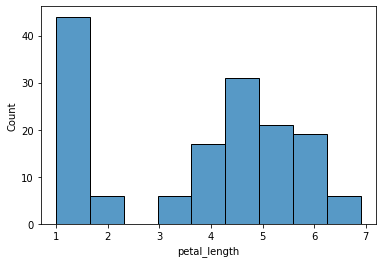

In [10]:
sns.histplot(iris.petal_length)

Petal lengths are biphasic with many being either very small and the rest being a somewhat normal distribution around a mean of 4.75 (overall mean of 3.75 driven down by small petal lengths).

#### 2. Is there a correlation between petal length and petal width? Use http://guessthecorrelation.com/ as a hint to how we could visually determine if a correlation exists between two numeric columns.

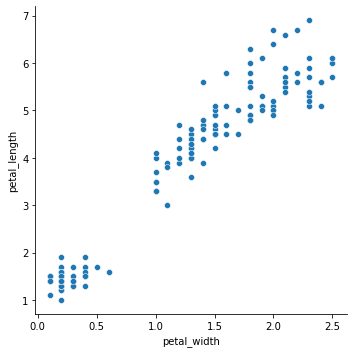

In [14]:
sns.relplot(x='petal_width', y = 'petal_length', data=iris)

There is a strong correlation between petal width and petal length (I'm guessing R =.85, I was was decent at the game in the url).

#### 3. Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lens of a categorical column.

In [15]:
iris.value_counts('species')

species
setosa        50
versicolor    50
virginica     50
dtype: int64

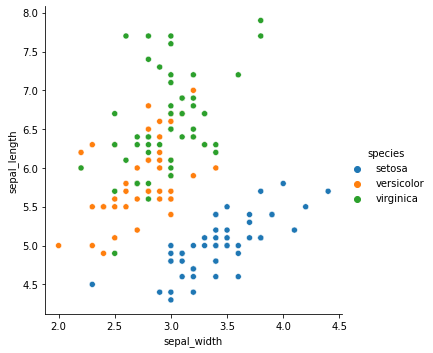

In [16]:
sns.relplot(x='sepal_width', y = 'sepal_length', hue = 'species', data=iris)

You could predict if it was a 'Sertosa', but could not distinguish between 'Versicolor' and 'Virginica'

#### 4. Which features would be best used to predict species?

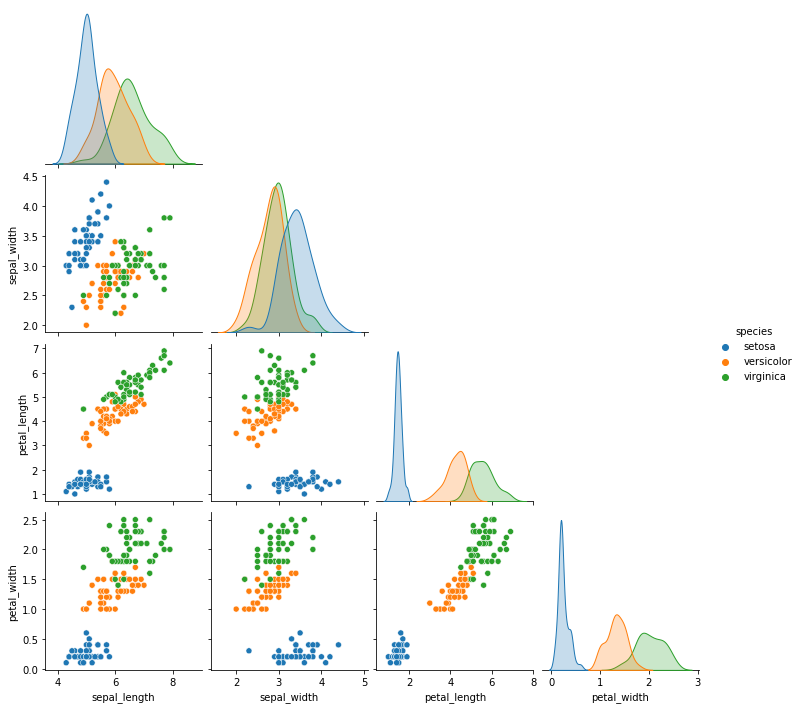

In [17]:
sns.pairplot(iris, hue='species', corner=True)

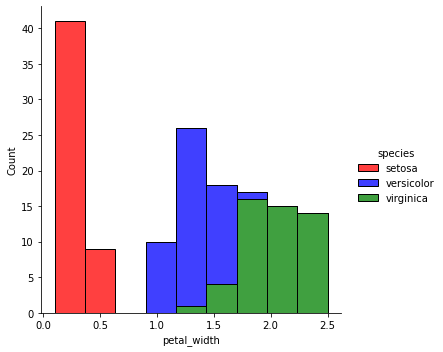

In [19]:
#sns.histplot(iris.petal_width, hue='species')

sns.displot(data = iris,
            x = 'petal_width',
            hue = 'species',
           multiple = 'stack',
           palette= ['r', 'b', 'g'])

Petal width is the best feature to predict species.  Adding in sepal width makes the pediction even stronger.

____

## Section 2 - Using other datasets

#### 1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

In [20]:
anscombe = sns.load_dataset('anscombe')

In [23]:
anscombe.describe()

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


In [25]:
anscombe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [28]:
anscombe.value_counts('dataset')

dataset
I      11
II     11
III    11
IV     11
dtype: int64

In [30]:
anscombe.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

All have effectively the same mean for both x and y.  Datasets I, II, and III have the same x values and are exceptionally similar in everything for y but max value;  Most of Dataset IV's x values are '8' and its y values are similar to the others.

#### Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

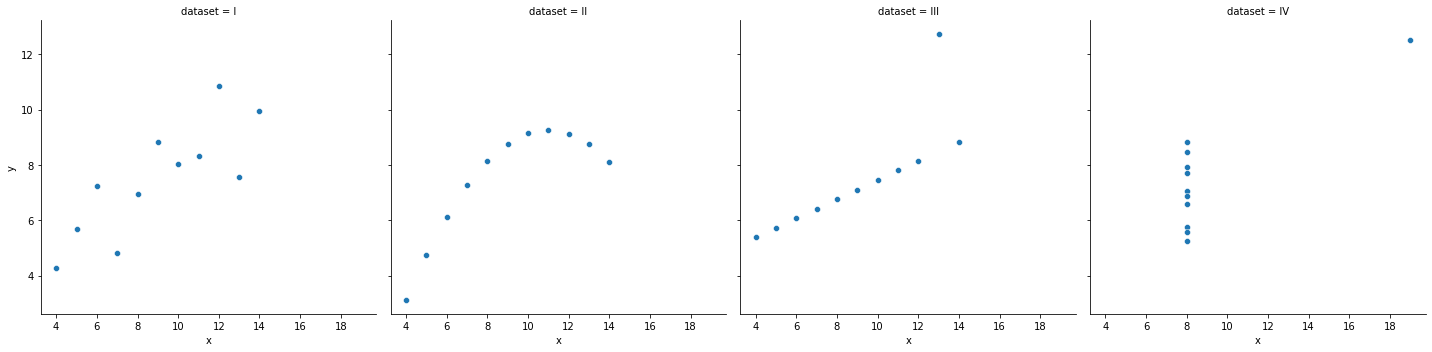

In [31]:
sns.relplot(x='x', y='y', col = 'dataset', data=anscombe)

#### 2. Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [35]:
from pydataset import data

In [36]:
insect_sprays = data("InsectSprays",show_doc=True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [41]:
insect_sprays = data('InsectSprays')

In [47]:
insect_sprays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 1 to 72
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   count   72 non-null     int64 
 1   spray   72 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [45]:
insect_sprays.value_counts('spray')

spray
A    12
B    12
C    12
D    12
E    12
F    12
dtype: int64

<AxesSubplot:xlabel='spray', ylabel='count'>

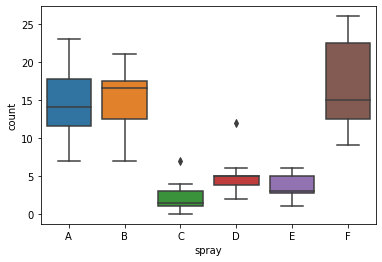

In [49]:
sns.boxplot(data = insect_sprays, y = 'count', x='spray')

#### 3. Load the swiss dataset and read it's documentation. The swiss dataset is available from pydatset rather than seaborn. Create visualizations to answer the following questions:

(1) Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)

In [51]:
swiss = data("swiss",show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [53]:
swiss = data("swiss")

In [54]:
swiss.describe()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
count,47.000000,47.000000,47.000000,47.000000,47.00000,47.000000
mean,70.142553,50.659574,16.489362,10.978723,41.14383,19.942553
std,12.491697,22.711218,7.977883,9.615407,41.70485,2.912697
min,35.000000,1.200000,3.000000,1.000000,2.15000,10.800000
25%,64.700000,35.900000,12.000000,6.000000,5.19500,18.150000
50%,70.400000,54.100000,16.000000,8.000000,15.14000,20.000000
75%,78.450000,67.650000,22.000000,12.000000,93.12500,21.700000
max,92.500000,89.700000,37.000000,53.000000,100.00000,26.600000


In [55]:
swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


In [59]:
swiss['is_catholic'] = swiss.Catholic > 90
swiss.sample(10)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Broye,83.8,70.2,16,7,92.85,23.6,True
Morges,65.5,59.8,22,10,5.23,18.0,False
Yverdon,65.4,49.5,15,8,6.10,22.5,False
Vevey,58.3,26.8,25,19,18.46,20.9,False
Lavaux,65.1,73.0,19,9,2.84,20.0,False
Courtelary,80.2,17.0,15,12,9.96,22.2,False
La Vallee,54.3,15.2,31,20,2.15,10.8,False
Aigle,64.1,62.0,21,12,8.52,16.5,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False
Porrentruy,76.1,35.3,9,7,90.57,26.6,True


(2) Does whether or not a province is Catholic influence fertility?

Yes, higher catholic regions generally have higher fertility rates.

(3) What measure correlates most strongly with fertility?

<AxesSubplot:>

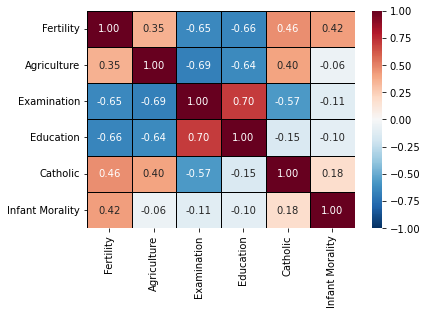

In [100]:
swiss.corr
labels = ['Fertility', 'Agriculture', 'Examination', 'Education', 'Catholic','Infant Morality']
sns.heatmap(swiss.corr(), annot = True,
           fmt = '0.2f', cmap = 'RdBu_r',
           center = 0,
           vmin = -1,
           linewidth = 1,
           linecolor = 'k',
            xticklabels = labels,
            yticklabels= labels)

Examination, followed closely by Education, correlate most strongly (negatively) with fertility.

#### 4. Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [70]:
from env import get_db_url

In [71]:
query = '''
SELECT *
FROM orders
'''

orders = pd.read_sql(query, get_db_url('chipotle'))
orders.head(10)

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
5,6,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]",$10.98
6,7,3,1,Side of Chips,nan,$1.69
7,8,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Pinto Beans, Cheese, Sour...",$11.75
8,9,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Cheese, Sour Cream, Lettuce]]",$9.25
9,10,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Lettuce]]",$9.25


In [88]:
top_4 = orders.groupby('item_name').quantity.sum().nlargest(n=4)
top_4

[item_name
 Chicken Bowl           761
 Chicken Burrito        591
 Chips and Guacamole    506
 Steak Burrito          386
 Name: quantity, dtype: int64]

In [86]:
sns.barplot()

TypeError: distplot() got an unexpected keyword argument 'data'

#### 5. Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [91]:
sleep = data("sleepstudy",show_doc=True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [97]:
sleep = data("sleepstudy")
sleep.sample(10)

,Reaction,Days,Subject
66,338.1665,5,333
55,317.4629,4,332
135,348.7402,4,352
99,455.8643,8,337
2,258.7047,1,308
143,257.2424,2,369
17,213.6303,6,309
174,310.6316,3,372
107,281.5648,6,349
125,271.8274,4,351
